In [161]:
import pandas as pd
from pandas import DataFrame
from pandas import read_excel, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [162]:
# 폰트 설정
#plt.rcParams['font.family'] = "Malgun Gothic" # 윈도우 전용
plt.rcParams['font.family'] = "Malgun Gothic"
#글자 크기
plt.rcParams["font.size"] = 12
# 그래프 크기설정(inch)
plt.rcParams["figure.figsize"] = (15, 7)
# 유티코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

In [163]:
csv_test = pd.read_csv('pratice.csv', encoding='euc-kr')
csv_test

,품목,등급,단량,단위,평균가
0,가죽나물(가죽나물(일반)),없음,4.0,kg,32000
1,가죽나물(가죽나물(일반)),특(1등,2.0,kg,14000
2,가죽나물(가죽나물(일반)),없음,4.0,kg,25000
3,가죽나물(가죽나물(일반)),없음,4.0,kg,25000
4,가죽나물(가죽나물(일반)),없음,4.0,kg,30000
...,...,...,...,...,...
15725,홍고추(홍청양),특(1등,10.0,kg,43500
15726,홍고추(홍청양),특(1등,11.0,kg,50000
15727,홍고추(홍청양),특(1등,13.0,kg,58000
15728,홍고추(홍청양),특(1등,4.0,kg,23000


In [164]:
csv_test.shape

(15730, 5)

In [165]:
df = csv_test.drop(['단위'], axis=1)
df

,품목,등급,단량,평균가
0,가죽나물(가죽나물(일반)),없음,4.0,32000
1,가죽나물(가죽나물(일반)),특(1등,2.0,14000
2,가죽나물(가죽나물(일반)),없음,4.0,25000
3,가죽나물(가죽나물(일반)),없음,4.0,25000
4,가죽나물(가죽나물(일반)),없음,4.0,30000
...,...,...,...,...
15725,홍고추(홍청양),특(1등,10.0,43500
15726,홍고추(홍청양),특(1등,11.0,50000
15727,홍고추(홍청양),특(1등,13.0,58000
15728,홍고추(홍청양),특(1등,4.0,23000


In [166]:
df.duplicated().sum()

2964

In [167]:
df.loc[df.duplicated(), :]

,품목,등급,단량,평균가
3,가죽나물(가죽나물(일반)),없음,4.0,25000
47,가지(가지(일반)),특(1등,10.0,33250
50,가지(가지(일반)),보통(3,5.0,10000
63,가지(가지(일반)),보통(3,5.0,10000
64,가지(가지(일반)),없음,8.0,25000
...,...,...,...,...
15710,홍고추(홍청양),특(1등,4.0,24000
15711,홍고추(홍청양),특(1등,5.0,25000
15717,홍고추(홍청양),특(1등,5.0,25000
15718,홍고추(홍청양),특(1등,10.0,47000


In [168]:
df = df.drop_duplicates()
df

,품목,등급,단량,평균가
0,가죽나물(가죽나물(일반)),없음,4.0,32000
1,가죽나물(가죽나물(일반)),특(1등,2.0,14000
2,가죽나물(가죽나물(일반)),없음,4.0,25000
4,가죽나물(가죽나물(일반)),없음,4.0,30000
5,가죽나물(가죽나물(일반)),특(1등,4.0,35000
...,...,...,...,...
15725,홍고추(홍청양),특(1등,10.0,43500
15726,홍고추(홍청양),특(1등,11.0,50000
15727,홍고추(홍청양),특(1등,13.0,58000
15728,홍고추(홍청양),특(1등,4.0,23000


In [169]:
df1 = df.drop(['품목'], axis=1)
df1

,등급,단량,평균가
0,없음,4.0,32000
1,특(1등,2.0,14000
2,없음,4.0,25000
4,없음,4.0,30000
5,특(1등,4.0,35000
...,...,...,...
15725,특(1등,10.0,43500
15726,특(1등,11.0,50000
15727,특(1등,13.0,58000
15728,특(1등,4.0,23000


In [170]:
target = []
for i in df1['등급']:
    if '없음' in i:
        target.append(0)
    elif '특' in i:
        target.append(1)
    elif '상' in i:
        target.append(2)
    else:
        target.append(3)
print(target)
df1['target'] = target

[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3, 1, 2, 3, 0, 2, 1, 2, 3, 0, 2, 1, 2, 3, 1, 1, 2, 3, 1, 2, 1, 2, 1, 3, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 1, 1, 2, 3, 1, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 3, 3, 1, 1, 1, 1, 2, 3, 1, 2, 3, 3, 3, 1, 2, 3, 3, 1, 2, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 1, 2, 3, 3, 1, 2, 3, 1, 1, 2, 3, 1, 2, 3, 3, 1, 3, 3, 1, 2, 3, 3, 0, 1, 1, 3, 3, 1, 0, 1, 3, 1, 3, 3, 0, 1, 0, 1, 0, 1, 0, 1, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 1, 1, 3, 0, 1, 3, 0, 1, 0, 1, 3, 3, 0, 1, 3, 0, 1, 3, 1, 1, 2, 0, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 0, 

In [171]:
# 시각화 라이브러리 설정
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

In [172]:
df1['target'].value_counts()

target
1    7543
2    3475
3    1121
0     627
Name: count, dtype: int64

In [173]:
df1 = df.drop(['등급', '품목'], axis=1)
df1

,단량,평균가
0,4.0,32000
1,2.0,14000
2,4.0,25000
4,4.0,30000
5,4.0,35000
...,...,...
15725,10.0,43500
15726,11.0,50000
15727,13.0,58000
15728,4.0,23000


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyp

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py

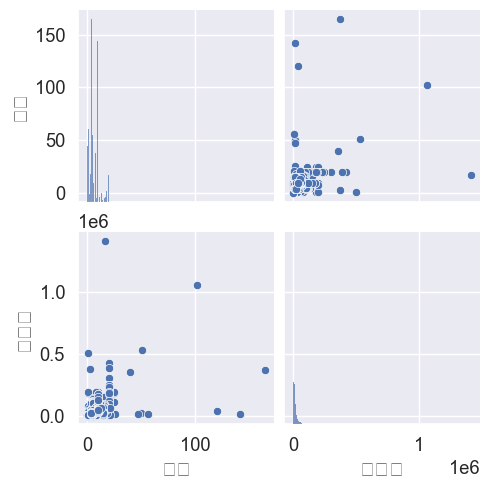

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df1[["단량", "평균가"]])
plt.show()

In [175]:
q1 = df['단량'].quantile(q=0.25)
q3 = df['단량'].quantile(q=0.75)
iqr = q3 - q1
하한1 = q1 - iqr *1.5
"단량에 대한 하한 극단치 경계값: %f" % 하한1

'단량에 대한 하한 극단치 경계값: -10.000000'

In [176]:
q1 = df['평균가'].quantile(q=0.25)
q3 = df['평균가'].quantile(q=0.75)
iqr = q3 - q1
하한2 = q1 - iqr *1.5
"평균가에 대한 하한 극단치 경계값: %f" % 하한2

'평균가에 대한 하한 극단치 경계값: -15356.250000'

In [177]:
q1 = df['평균가'].quantile(q=0.25)
q3 = df['평균가'].quantile(q=0.75)
iqr = q3 - q1
상한 = q3 + iqr * 1.5
"평균가에 대한 상한 극단치 경계값: %f" % 상한

'평균가에 대한 상한 극단치 경계값: 41213.750000'

In [178]:
df2 = df.query('평균가 > @상한')
df2['평균가']

148      42000
224      64923
228      61594
231      58452
263      42427
         ...  
15712    47000
15725    43500
15726    50000
15727    58000
15729    43250
Name: 평균가, Length: 860, dtype: int64

In [179]:
df1 = df[df['평균가']>41213].index
df1

Index([  148,   224,   228,   231,   263,   274,   282,   288,   293,   295,
       ...
       15698, 15704, 15705, 15708, 15709, 15712, 15725, 15726, 15727, 15729],
      dtype='int64', length=860)

In [180]:
df2 = df.drop(df1)

In [181]:
df2.drop(['품목'], axis=1)
df2

,품목,등급,단량,평균가
0,가죽나물(가죽나물(일반)),없음,4.0,32000
1,가죽나물(가죽나물(일반)),특(1등,2.0,14000
2,가죽나물(가죽나물(일반)),없음,4.0,25000
4,가죽나물(가죽나물(일반)),없음,4.0,30000
5,가죽나물(가죽나물(일반)),특(1등,4.0,35000
...,...,...,...,...
15721,홍고추(홍청양),특(1등,10.0,40571
15722,홍고추(홍청양),특(1등,4.0,19500
15723,홍고추(홍청양),특(1등,10.0,40222
15724,홍고추(홍청양),특(1등,4.0,19100


In [182]:
from sklearn.preprocessing import StandardScaler

# 표준화란 데이터의 평균을 0, 분산과 표준편차를 1로 만들어주는 것을 말하는데요,
# 표준화를 하는 이유는 다른 통계 데이터와 비교하는 데에 있어 용이하게 하기 위함입니다.

# StandardScaler 객체 생성
scaler = StandardScaler()

# standardSacler 로 데이터 셋 변환. fit()과 transfrom() ghcnf
scaler.fit(df)
scaled = scaler.transform(df)
scaled

ValueError: could not convert string to float: '가죽나물(가죽나물(일반))'

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWa

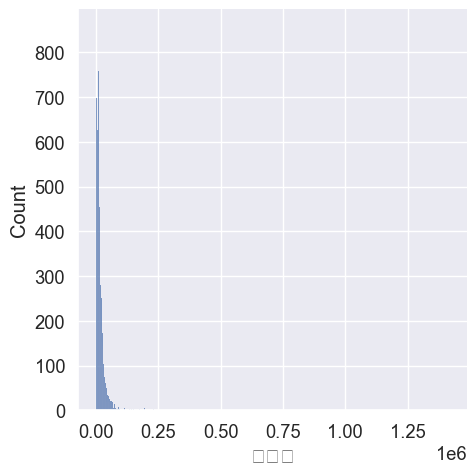

In [ ]:
sns.displot(x='평균가', kind='hist', data=df1)
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWa

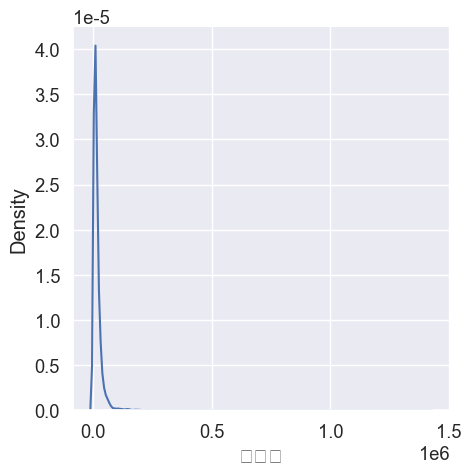

In [ ]:
sns.displot(x='평균가', kind='kde', data=df1)
plt.show()

In [ ]:
# 품종별 sepal_length 값의 분포
sns.displot(x='평균가', hue='target', kind='kde', data=df)
plt.show()

ValueError: Could not interpret value `target` for parameter `hue`

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyp

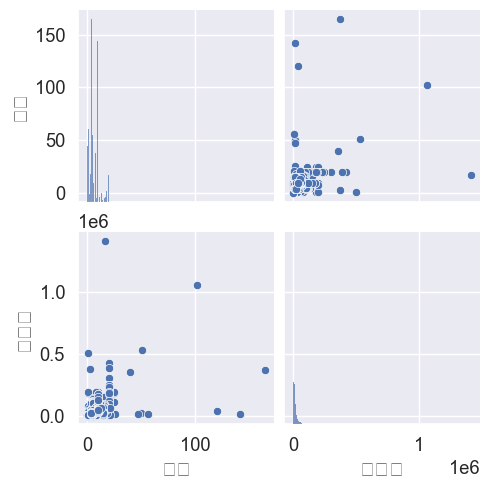

In [ ]:
sns.pairplot(df1, size=2.5, diag_kind='hist')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_data = df.loc[:,'단량':'평균가']
y_data = df.loc[:,'target']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

KeyError: 'target'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_knn_pred = knn.predict(x_test)
print("예측값:", y_knn_pred[:5])

예측값: [1 1 1 2 1]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print(f"accuracy:{knn_acc}%")

accuracy:0.5849647611589663%


In [ ]:
# 모델학습
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [ ]:
# 예측
y_svc_pred = svc.predict(x_test)
print("예측값:", y_svc_pred[:80])
# 성능평가
svc_acc = accuracy_score(y_test, y_knn_pred)
print("accuracy:%4f" % svc_acc)

예측값: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
accuracy:0.584965


In [ ]:
# 모델학습 
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# 예측
y_lrc_pred = lrc.predict(x_test)
print("예측값:", y_lrc_pred[50:])
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print("정확도:%4f" % lrc_acc)

NameError: name 'lrc' is not defined

In [ ]:
# 확률 값 예측
y_lrc_prod = lrc.predict_proba(x_test)
y_lrc_prod

array([[0.14475899, 0.48382092, 0.23214012, 0.13927997],
       [0.07990857, 0.5316812 , 0.25398932, 0.13442091],
       [0.10578963, 0.4753335 , 0.25129199, 0.16758488],
       ...,
       [0.04267885, 0.57030579, 0.2664021 , 0.12061326],
       [0.14553686, 0.49357217, 0.22983348, 0.13105749],
       [0.00800249, 0.540848  , 0.30702651, 0.14412301]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=20)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=20)

In [ ]:
# 예측
y_dtc_pred = dtc.predict(x_test)
print("예측값:", y_dtc_pred[:5])
# 성능평가
dtc_acc = accuracy_score(y_test, y_dtc_pred)
print("정확도:%4f" % dtc_acc)

예측값: [1 1 1 1 1]
정확도:0.597103


In [ ]:
# hard Voting 모델 학습 및 예측
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN', knn), ('SVM', svc), ('DT',dtc)], voting='hard')
hvc.fit(x_train, y_train)
# 예측
y_hvc_pred = hvc.predict(x_test)
print("예측값", y_hvc_pred[:5])
# 성능평가
hvc_acc = accuracy_score(y_test, y_hvc_pred)
print("정확도:%4f" % hvc_acc)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


예측값 [1 1 1 1 1]
정확도:0.597103


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rfc.fit(x_train, y_train)
# 예측
y_rfc_pred = rfc.predict(x_test)
print("예측값:", y_rfc_pred[:5])
# 모델 성능 평가
rfc_acc = accuracy_score(y_test, y_rfc_pred)
print("정확도:%4f" % rfc_acc)

예측값: [1 1 1 1 1]
정확도:0.597103


In [ ]:
# 모델 학습 및 예측
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=50, max_depth=3, random_state=20) 
# random_state 무작위추출
xgbc.fit(x_train, y_train)
# 예측
y_xgbc_pred = xgbc.predict(x_test)
print("예측값:", y_xgbc_pred)
# 모델 성능 평가
xgbc_acc = accuracy_score(y_test, y_xgbc_pred)
print("정확도:", xgbc_acc)

예측값: [1 1 1 ... 1 1 1]
정확도: 0.5986687548942835


In [ ]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3, shuffle=True, random_state=20)
print(x_tr.shape, y_tr.shape)
print(x_val.shape, y_val.shape)

(7148, 2) (7148,)
(3064, 2) (3064,)


In [ ]:
# 학습
rfc = RandomForestClassifier(max_depth=3, random_state=20)
rfc.fit(x_tr, y_tr)
# 예측
y_tr_pred = rfc.predict(x_tr)
y_val_pred = rfc.predict(x_val)
# 검증
tr_acc = accuracy_score(y_tr, y_tr_pred)
val_acc = accuracy_score(y_val, y_val_pred)
print("트레인 정확도:%4f" % tr_acc)
print("val정확도 :%4f" % val_acc)

트레인 정확도:0.590655
val정확도 :0.586162


In [ ]:
# 테스트 데이터 예측 및 평가
y_test_pred = rfc.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("test 정확도 : %4f" % test_acc)

test 정확도 : 0.597103


In [ ]:
# 데이터셋을 5개의 Fold로 분할하는 KFold 클래스 객체 생성
from sklearn.model_selection import KFold
kFold = KFold(n_splits=5, shuffle=True, random_state=20)
# 훈련용 데이터와 검즈용 데이터의 행 인덱스를 각 Fold별로 구분하여 생성
num_foid = 1
for tr_idx, val_idx, in kFold.split(x_train):
    print("%s Fold---------------------" % num_foid)
    print("훈련:", len(tr_idx), tr_idx[:10])
    print("검증:", len(val_idx), val_idx[:10])
    num_foid = num_foid +1

1 Fold---------------------
훈련: 8169 [ 0  1  2  4  5  6  7  8 11 12]
검증: 2043 [ 3  9 10 29 35 42 45 49 50 60]
2 Fold---------------------
훈련: 8169 [ 1  2  3  4  5  7  8  9 10 11]
검증: 2043 [ 0  6 12 18 28 32 37 38 47 53]
3 Fold---------------------
훈련: 8170 [ 0  2  3  4  6  8  9 10 11 12]
검증: 2042 [ 1  5  7 14 19 20 25 31 33 36]
4 Fold---------------------
훈련: 8170 [ 0  1  2  3  5  6  7  8  9 10]
검증: 2042 [ 4 11 13 17 21 22 23 24 27 34]
5 Fold---------------------
훈련: 8170 [ 0  1  3  4  5  6  7  9 10 11]
검증: 2042 [ 2  8 15 16 26 30 43 46 48 51]


In [ ]:
val_scores = []
num_foid = 1
for tr_idx, val_idx in kFold.split(x_train, y_train):
    # 훈련용 데이터와 검즈용 데이터를 행 인덱스 기준으로 추출
    x_tr, x_val = x_train.iloc[tr_idx, :], x_train.iloc[val_idx, :]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    # 학습
    rfc = RandomForestClassifier(max_depth=5, random_state=20)
    rfc.fit(x_tr, y_tr)
    # 검증
    y_val_pred = rfc.predict(x_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    print("%d Fold 정확도 : %4f" % (num_foid, val_acc))
    val_scores.append(val_acc)
    num_foid += 1

1 Fold 정확도 : 0.597161
2 Fold 정확도 : 0.585414
3 Fold 정확도 : 0.611166
4 Fold 정확도 : 0.578844
5 Fold 정확도 : 0.589128


In [ ]:
# 5개 폴드의 검증 정확도를 평균한다.
# 평균 Accuracy 계산
import numpy as np
mean_score = np.mean(val_scores)
print("평균검증 정확도 :", np.round(mean_score, 4))

평균검증 정확도 : 0.5923
